In [ ]:
## Importing required packages

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import cv2

(1482, 1982, 3)
(256, 256, 3)


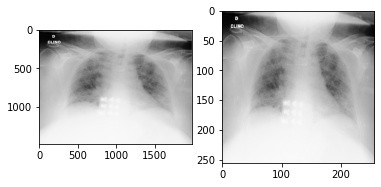

In [ ]:
image_1=cv2.imread('/content/drive/MyDrive/multilabel dataset/train/train/COVID19/COVID19(1).jpg')

# original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

## resizing the image

image_resize=cv2.resize(image_1,((256,256)))


print(image_resize.shape)
plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [ ]:
## setting same size of an image

img_height,img_width=[256,256]


In [ ]:
## finding the data:\
path='/content/drive/MyDrive/multilabel dataset'

In [ ]:
## Finding training data path and test data path

train_data_path='/content/drive/MyDrive/multilabel dataset/train/train'
test_data_path='/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test'

In [ ]:
## importing tensorflow and its modules

import tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image preprocessing using tensorflow ImageDataGenerator module

In [ ]:
# follow = https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

training_prepross=ImageDataGenerator(rescale=1./255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

## since train data is rescaled same has to be followed with test data

testing_prepross=ImageDataGenerator(rescale=1./255)

In [ ]:
## Finding the label folders:
## Using glob we can find the number of label folders in train_dataset

import glob
from glob import glob

## for training
glob('/content/drive/MyDrive/multilabel dataset/train/train/*')

['/content/drive/MyDrive/multilabel dataset/train/train/PNEUMONIA',
 '/content/drive/MyDrive/multilabel dataset/train/train/COVID19',
 '/content/drive/MyDrive/multilabel dataset/train/train/NORMAL']

In [ ]:
## for testing

glob('/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test/*')

['/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test/COVID19',
 '/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test/NORMAL',
 '/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test/PNEUMONIA']

In [ ]:
target=['COVID19','NORMAL','PNEUMONIA']

In [ ]:
## collecting data from training and test folders

train_data=training_prepross.flow_from_directory(train_data_path,
                                                 target_size=(img_height,img_width),
                                                 classes=target,
                                                 class_mode='categorical',
                                                 batch_size=32)


Found 5159 images belonging to 3 classes.


In [ ]:
test_data=testing_prepross.flow_from_directory(test_data_path,target_size=(img_height,img_width),
                                               classes=target,
                                               class_mode='categorical',
                                               batch_size=32)

Found 1288 images belonging to 3 classes.


Developing Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax


In [ ]:
model = Sequential()

# first kernel and max poo layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (img_height,img_width,3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# second kernel and max poo layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# third kernel and max poo layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# forth kernel and max poo layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) # one dimensional array

# above 1d data give to ANN 
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2

# output layer 
model.add(Dense(3,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
model.fit(train_data , epochs = 20)

Epoch 1/20
162/162 [==============================] - 2749s 17s/step - loss: 0.6760 - Accuracy: 0.7180
Epoch 2/20
162/162 [==============================] - 199s 1s/step - loss: 0.3982 - Accuracy: 0.8521
Epoch 3/20
162/162 [==============================] - 203s 1s/step - loss: 0.3406 - Accuracy: 0.8641
Epoch 4/20
162/162 [==============================] - 200s 1s/step - loss: 0.3371 - Accuracy: 0.8680
Epoch 5/20
162/162 [==============================] - 201s 1s/step - loss: 0.2851 - Accuracy: 0.8930
Epoch 6/20
162/162 [==============================] - 199s 1s/step - loss: 0.2685 - Accuracy: 0.9029
Epoch 7/20
162/162 [==============================] - 201s 1s/step - loss: 0.2711 - Accuracy: 0.9025
Epoch 8/20
162/162 [==============================] - 200s 1s/step - loss: 0.2439 - Accuracy: 0.9070
Epoch 9/20
162/162 [==============================] - 202s 1s/step - loss: 0.2336 - Accuracy: 0.9132
Epoch 10/20
162/162 [==============================] - 199s 1s/step - loss: 0.2393 - Accu

In [ ]:
d = model.predict(test_data)

41/41 [==============================] - 935s 23s/step


In [ ]:
## creating validation report:

test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
d

array([[1.3562154e-04, 2.3036473e-03, 9.9756074e-01],
       [4.6956720e-04, 4.4279061e-02, 9.5525140e-01],
       [2.9876857e-05, 9.8260373e-01, 1.7366370e-02],
       ...,
       [9.9988306e-01, 5.4969838e-05, 6.2029874e-05],
       [3.7667942e-05, 8.7956917e-01, 1.2039312e-01],
       [3.2358660e-04, 5.4080363e-02, 9.4559610e-01]], dtype=float32)

In [ ]:
predicted_points=np.argmax(d,axis=1)

In [ ]:
predicted_points

array([2, 2, 1, ..., 0, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [ ]:
accuracy_score(test_data.classes,predicted_points)

0.5225155279503105

In [ ]:
confusion_matrix(test_data.classes,predicted_points)

array([[  7,  32,  77],
       [ 27,  81, 209],
       [ 58, 212, 585]])

In [ ]:
print(classification_report(test_data.classes , predicted_points))

              precision    recall  f1-score   support

           0       0.08      0.06      0.07       116
           1       0.25      0.26      0.25       317
           2       0.67      0.68      0.68       855

    accuracy                           0.52      1288
   macro avg       0.33      0.33      0.33      1288
weighted avg       0.51      0.52      0.52      1288



In [ ]:
## testing images

In [ ]:
import cv2

In [ ]:
target

['COVID19', 'NORMAL', 'PNEUMONIA']

In [ ]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (256,256))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  sol = np.argmax(result , axis = 1)
  print(sol[0])
  print(target[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

(1611, 1677, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 16ms/step
[[0.40375537 0.00075813 0.59548646]]
2
PNEUMONIA


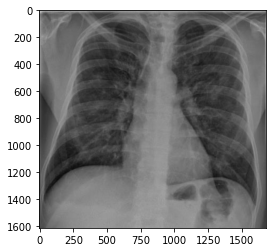

In [ ]:
prediction('/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test/COVID19/10.jpg')

(1059, 1276, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 27ms/step
[[4.6952453e-04 9.4541514e-01 5.4115325e-02]]
1
NORMAL


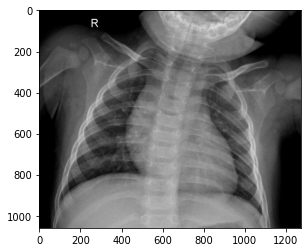

In [ ]:
prediction('/content/drive/MyDrive/multilabel dataset/test-20230210T062625Z-001/test/NORMAL/NORMAL(1269).jpg')